### ECE-GY 6123
### Nikita Makarov, Fall 2024

### Homework 1

Problem 1a:

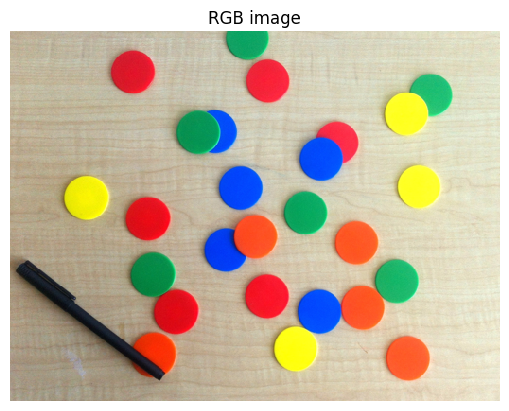

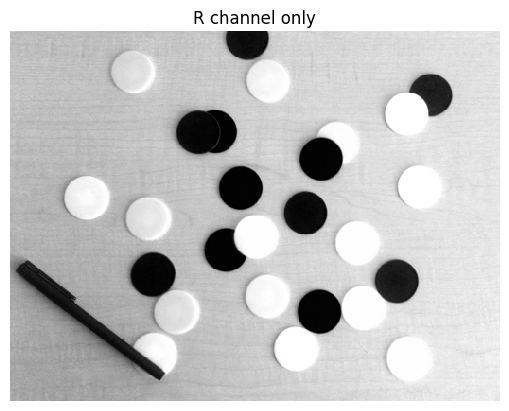

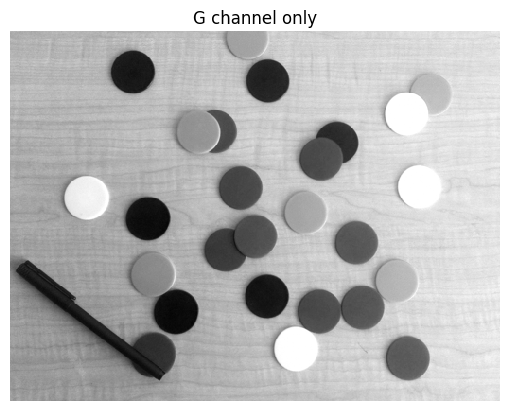

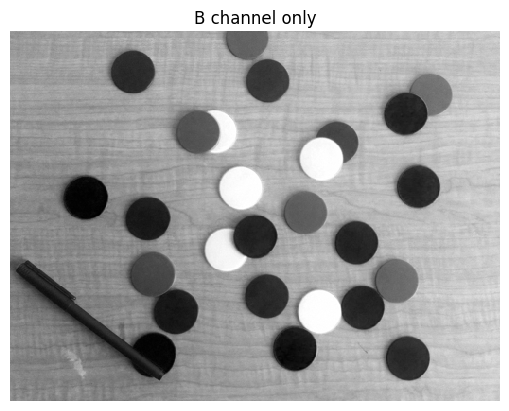

In [2]:
from PIL import Image
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# Load color image
img = Image.open('coloredChips.png')
img.load()
RGB_data = np.asarray(img) # This image has 24 bit depth (8x3)

# Create image for RGB
plt.figure()
plt.imshow(RGB_data, interpolation='none')
plt.axis('off')
plt.title('RGB image')

# Create image for R channel
R_data = RGB_data[:,:,0]
plt.figure()
plt.imshow(R_data, interpolation='none', cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('R channel only')

# Create image for G channel
G_data = RGB_data[:,:,1]
plt.figure()
plt.imshow(G_data, interpolation='none', cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('G channel only')

# Create image for B channel
B_data = RGB_data[:,:,2]
plt.figure()
plt.imshow(B_data, interpolation='none', cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('B channel only')

# Display all images
plt.show()

This image contains several colored chips with a black pen on a light wooden background. The red, yellow, and orange chips are the brightest in the red channel image. The yellow and green chips are the brightest in the green channel image. The blue and green chips are the brightest in the blue channel image. The light wooden background is mostly comprised of all colors so it appears similar across all three channels. The green chips are a slightly darker shade of pure green so they do not appear bright on the green channel image, but they are much brighter along the edge where the light is hitting them. Yellow appears to be a combination of red and green, so those chips are bright in both of those channels.

Problem 1b:

C:\Users\nmakarov\AppData\Local\Temp\ipykernel_36416\2749078244.py:7: RuntimeWarning: invalid value encountered in divide
  theta = np.arccos((1/2*((R-G)+(R-B)))/np.sqrt((R-G)*(R-G)+(R-B)*(G-B))) * 180/np.pi # Calculate theta in degrees


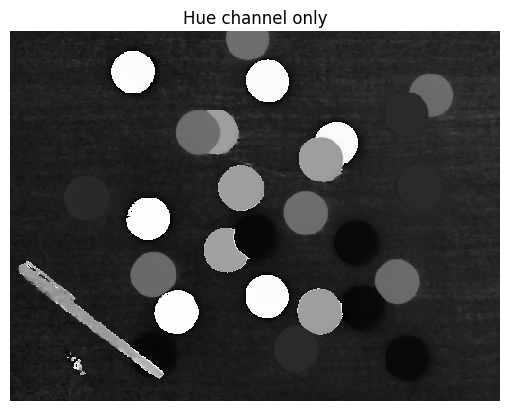

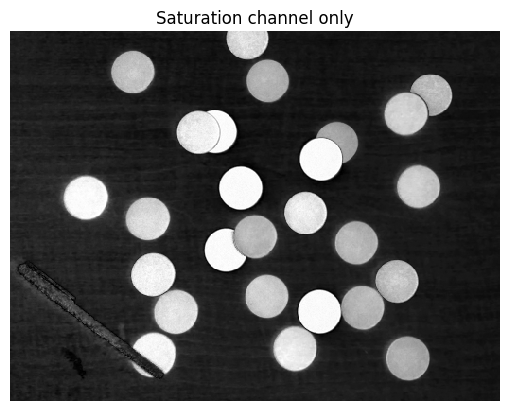

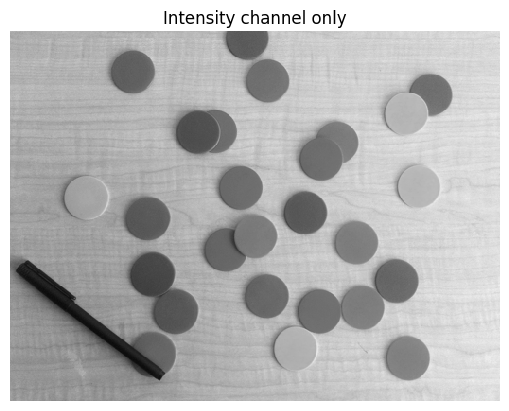

In [3]:
# Normalize RGB arrays
R = R_data/255
G = G_data/255
B = B_data/255

# Create hue (H) data array and create image
theta = np.arccos((1/2*((R-G)+(R-B)))/np.sqrt((R-G)*(R-G)+(R-B)*(G-B))) * 180/np.pi # Calculate theta in degrees
H = np.zeros_like(theta) # Init hue array
TF = B <= G
H[TF] = theta[TF] # First part of hue array
H[~TF] = 360-theta[~TF] # Second part of the hue array
plt.figure()
plt.imshow(H, interpolation='none', cmap='gray', vmin=0, vmax=360)
plt.axis('off')
plt.title('Hue channel only')

# Create saturation (S) data array and create image
S = 1 - (3 * np.min([R,G,B],axis=0))/(R+G+B)
plt.figure()
plt.imshow(S, interpolation='none', cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('Saturation channel only')

# Create intensity (I) data array and create image
I = (R+G+B)/3
plt.figure()
plt.imshow(I, interpolation='none', cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('Intensity channel only')

# Display all images
plt.show()

Since hue is the dominant color for each pixel, it is not so easily represented in gray scale. The degree value from 0 to 360 degrees is the angle from the center of the color wheel to the dominant color of the pixel. Going from the brightest to the darkest parts of the image, we can see that the red pixels are at one end, followed by blue, green, yellow, and finally orange. These are the same order of colors along the outside of the color wheel.

Saturation is a measure of the purity of the dominant three colors, RGB. All of the colored chips are very pure in color, so they all appear as very bright. The white-washed background and black pen are not as pure, so they are darker.

Intensity is the brightness, which is closely related to representing the original image in gray scale. The light background and yellow areas of the image are brightest, while the other areas are darker.

Problem 1c:

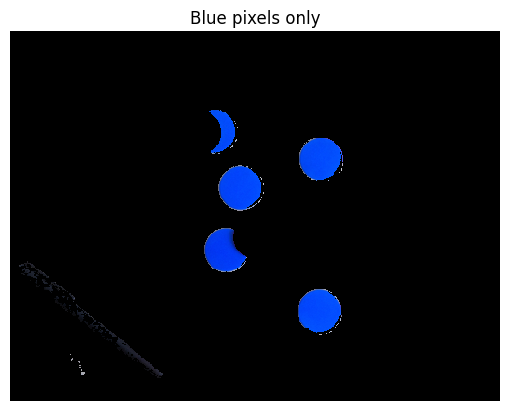

In [4]:
# Detect blue pixels and mask in original image
TF = (H/2 >= 110) & (H/2 <= 130) # Blue pixels are true
B_masked = np.zeros_like(RGB_data)
B_masked[TF,:] = RGB_data[TF,:]
plt.imshow(B_masked, interpolation='none') # Display blue pixel masked image
plt.axis('off')
plt.title('Blue pixels only')
plt.show()

The blue pixels are very visible when using the blue hue as a mask.

Problem 2a:

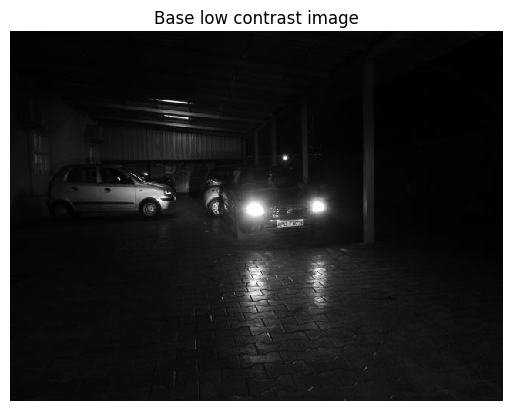

In [24]:
# Load grayscale low contrast image
img = Image.open(R"C:\Program Files\MATLAB\R2022b\toolbox\images\imdata\car_3.jpg").convert('L')
img.load()
img_base = np.asarray(img) # This image has 8 bit depth

# Create image
plt.figure()
plt.imshow(img_base, interpolation='none', cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Base low contrast image')

# Display all images
plt.show()

Problem 2b:

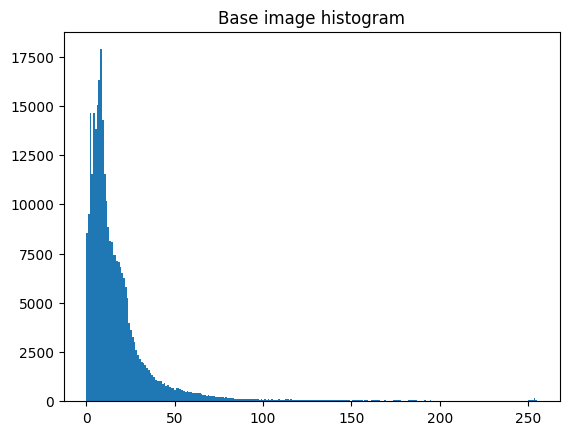

In [27]:
# Create histogram
counts, bins = np.histogram(img_base, bins=256) # Histogram with each pixel intensity value having its own bin
plt.figure()
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Base image histogram')

# Display all images
plt.show()

The low contrast grayscale image is mostly dark, with only a few lights creating bright areas of the image. The histogram shows that most of the pixels are dark, less than 25 intensity out of 255. There are a few very small peaks in the upper range which are from the few bright areas of the image.

Problem 2c

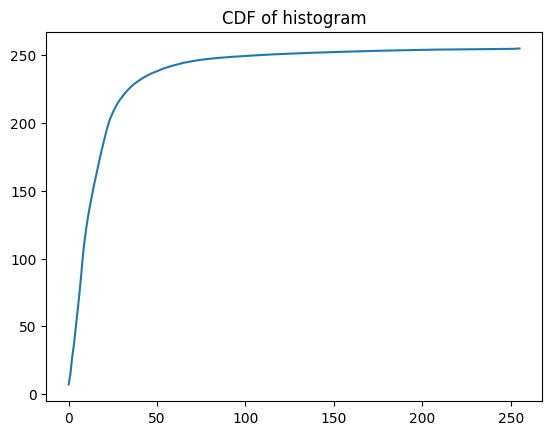

In [28]:
# Create cumulative distribution function (CDF)
CDF = counts.cumsum() # Cumulative sum of histogram
CDF = CDF * 255 / max(CDF)

# Plot CDF
plt.figure()
plt.plot(CDF)
plt.title('CDF of histogram')

# Display all images
plt.show()

This would be an appropriate equalization function for this image. The function would boost the brighter parts of the image, with an intensity of above 50, while suppressing the darker parts of the image, with an intensity of below 25. This should brighten the overall image and equalize the histogram, improving contrast.

Problem 2d